<header>
     <img src="Source/header.png"  alt="Hedaar" height="200" width="900">                                 
</header>

## Analyze A/B Test Results

<header>
     <img src="Source/project.png"  alt="Hedaar" height="400" width="900">                                 
</header>


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

<a id='probability'></a>
<header>
     <img src="Source/1.png"  alt="Hedaar" height="400" width="1200">                                 
</header>
To get started, let's import our libraries.

In [79]:
# Import important libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [80]:
# read data
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [134]:
# shape return column and rows number the data set containg 5 columns
#and 294478 rows.
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [82]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [83]:
df['converted'].value_counts(normalize=True) * 100

0    88.034081
1    11.965919
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't line up.

In [84]:
# I want to count the number of rows where treatment and new page don't match
# There are 2 cases here  (treatment and !new) or (control and new)
num_not_new = df.query("((group == 'treatment')&(landing_page != 'new_page')) or ((group == 'control')&(landing_page == 'new_page'))").count()
print('The number of times the new_page and treatment don''t line up',num_not_new[0])

The number of times the new_page and treatment dont line up 3893


f. Do any of the rows have missing values?

In [85]:
# Numbers of missing value in each row
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [86]:
# Query represent treatment align new page or control align old_page
df2_query = df.query("((group == 'treatment')&(landing_page == 'new_page')) or ((group == 'control')&(landing_page == 'old_page'))")
df2 = df2_query

In [87]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [88]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [89]:
df2['user_id'].value_counts().head(1)

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [90]:
row_information = df2.query("user_id == 773192") 
row_information

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [91]:
df2.drop_duplicates(['user_id'], keep='first',inplace = True)

# check if it works 
df2.duplicated().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0

<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [92]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [132]:
group_mean = df2['converted'].groupby(df2['group']).mean()

group_mean[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [133]:
group_mean[1]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [95]:
probability = df2.query("landing_page == 'new_page'").count() / df2['landing_page'].shape[0]
print(probability[0])

0.500061944223


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

<p><span style="background-color: #ffb8b8;">- Given that an individual was in the control group, the probability they converted = 0.12</span></p>
<p><span style="background-color: #ffb8b8;">- Given that an individual was in the treatment group, the probability they converted = 0.11</span></p>
<p><span style="background-color: #ffb8b8;">- Based on this result we cannot conclude that the new treatment page leads to more conversions, but, both pages have almost similar performance.</span></p>


<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

<a id='ab_test'></a>
<header>
     <img src="Source/2.png"  alt="Hedaar" height="400" width="900">                                 
</header>

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<p><span style="background-color: #FFF0AA;">H0: **$p_{new}$** =&lt; **$p_{old}$**</span></p>
<p><span style="background-color: #FFF0AA;">H1: **$p_{new}$** &gt; **$p_{old}$**</span></p>

<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [96]:
p_new = df2['converted'].mean()
print(p_new)

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [97]:
p_old = df2['converted'].mean()
print(p_old)

0.119597087245


c. What is $n_{new}$?

In [98]:
num_new = df2.query("landing_page == 'new_page'").count()[0]
print(num_new)

145310


d. What is $n_{old}$?

In [99]:
num_old = df2.query("landing_page == 'old_page'").count()[0]
print(num_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [100]:
#I want to generate a random sample from the new page converted 
#that contain 0's and 1's
new_page_converted = np.random.choice([0,1], size=num_new, p=[p_new, (1-p_new)])

# Display converte through rate
new_page_converted

array([1, 0, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [101]:
#I want to generate a random sample from the old page converted 
#that contain 0's and 1's
old_page_converted = np.random.choice([0,1], size=num_old, p=[p_old, (1-p_old)])
# Display converte through rate
old_page_converted

array([1, 1, 0, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [102]:
# The size of new_page_converted is greater than the size of old_page_converted
# so I will fix this problem by taking a part of it.
new_page_converted = new_page_converted[:num_old]

# Compute the observed difference in convarte through rates
obs_diff = new_page_converted.mean() - old_page_converted.mean()

# Display observed difference
obs_diff

0.00042677974035276733

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [103]:
# Create a sampling distribution of the difference in proportions
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=num_new, p=[p_new, (1-p_new)])
    old_page_converted = np.random.choice([0,1], size=num_old, p=[p_old, (1-p_old)])
    
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<span style="background-color: #30336b;"><span style="color: #ffffff;"> Does this plot look like what you expected?</span> </span><br />

 
<span style="background-color: #FFF0AA;">Before talking about the plot, the idea of using 10K difference proportions value is to ensure the value is correct not calculated by the chance.
The plot meet my expectation because the p-value we calculated is nearly 0 and the histogram have a high frequency in the same area. </span></p>


 

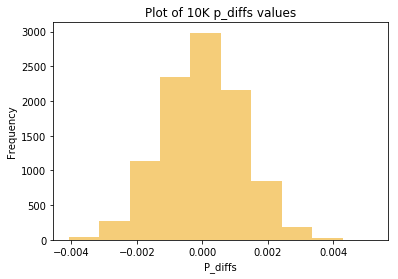

In [115]:
# plot hist 
plt.hist(p_diffs,color='#f5cd79')

# plot title
plt.title('Plot of 10K p_diffs values')

# X label
plt.xlabel('P_diffs')

# Y label
plt.ylabel('Frequency')

plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [105]:
#Actual difference observed in ab_data.csv
avg = df2['converted'].groupby(df2["group"]).mean()
act_diff = avg[1] - avg[0]


#Proportion of the p_diffs are greater than the actual difference observed
(p_diffs > act_diff).mean()

0.89949999999999997

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<p><span style="background-color: #30336b;"><span style="color: #ffffff;">Q1) What you just computed in part j</span> </span><br /><span style="background-color: #FFF0AA;">This part computes the proportion of the p_diffs values that are greater than the actual difference observed in the data frame.</span></p>
<p><span style="color: #ffffff; background-color: #30336b;">Q2) What is this value called in scientific studies?</span><br /><span style="background-color: #FFF0AA;">This value called p-value.</span></p>
<p><span style="background-color: #30336b; color: #ffffff;">Q3) What does this value mean in terms of whether or not there is a difference between the new and old pages?</span><br /><span style="background-color: #FFF0AA;">When the p-value is equal to 0.90 that means we accept the null hypothesis. The null hypothesis said there are no changes in page converted performance between the old and new page.</span></p>
<p>&nbsp;</p>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [106]:
convert_old = df2.query("((group == 'control')&(converted == 1))").shape[0]
convert_new = df2.query("((group == 'treatment')&(converted == 1))").shape[0]

n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [107]:
# From the reference above
# Proportions_ztest is the function most useful for checking 
# if two proportions are statistically better-than or not..

z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller')

print('z_score = ', z_score
     , '\n p_value',p_value)

z_score =  1.31092419842 
 p_value 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [123]:
from scipy.stats import norm

z_sig = norm.cdf(z_score)# Tells us how significant our z-score is

crit_value = norm.ppf(1-(0.05))# Tells us what our critical value at 95% confidence is


print('Significant of z-score = ',z_sig
     ,'\n Critical value at 95% confidence = ',crit_value )

Significant of z-score =  0.905058312759 
 Critical value at 95% confidence =  1.64485362695


<p><span style="background-color: #FFF0AA;">Since the z-score of 1.31 less than the critical value of 1.64, we accept the null hypothesis and this finding agree with j and k.</span></p>

<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

<a id='regression'></a>
<header>
     <img src="Source/3.png"  alt="Hedaar" height="400" width="900">                                 
</header>

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<p><span style="background-color: #B4D8E7;">Logistic regression</span></p>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [109]:
import statsmodels.api as sm

#create a dummy variable column for which page convertid  or not.
df2[['control','treatment']] = pd.get_dummies(df['group'])
df2.drop('control', axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [110]:
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [111]:
#create intercept column
df2['intercept'] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
# Logistic regression model
logit_mod = sm.Logit(df2['converted'],df2[['intercept' ,'treatment']])

In [113]:
# Model fit
mod_fit = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [114]:
# Model result
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 02 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:30:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br> 

<p><span style="background-color: #30336b; color: #ffffff;">What is the p-value associated with ab_page?</span><br /><span style="background-color: #b4d8e7;">0.190.</span></p>
<p><span style="color: #ffffff; background-color: #30336b;">Why does it differ from the value you found in the Part II?</span><br /><span style="background-color: #b4d8e7;">Because the null hypotheses of logistic regression determine if the new page <span style="background-color: #FFF0AA;">equal</span> old page and alternative hypotheses determine if the new page, <span style="background-color: #ffb8b8;">not equal</span> old page. But, Part II hypotheses determine if a new page <span style="background-color: #FFF0AA;">equal or smaller</span> old page and alternative hypotheses determine if it <span style="background-color: #ffb8b8;">greater</span>.</span></p>
<p><span style="color: #ffffff; background-color: #30336b;">Logistic regression hypotheses :</span></p>
<p><span style="background-color: #b4d8e7;">H0: **$p_{new}$** = **$p_{old}$**</span></p>
<p><span style="background-color: #b4d8e7;">H1: **$p_{new}$** != **$p_{old}$**</span></p>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<p><span style="color: #ffffff; background-color: #30336b;">- There many influences whether or not an individual converts for example : </span><br /><span style="background-color: #b4d8e7;">1) What about the student account is it a new account or not?</span><br /><span style="background-color: #b4d8e7;">2) What about the student gender?<br />3)What about student age?<br />4)What about the time is it related to a specific season like the beginning of study year?<br /><br /></span></p>

<p><br /><span style="background-color: #b4d8e7;">- The disadvantage of adding additional terms of the regression model is whatever the number of the factors in our model we may miss the most important factor. Also, It required a large sample size of each term to make the result more stable.</span></p>

<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns.

In [45]:
# Read countries dataset 
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [59]:
# Join 2 dataset
new_dataset = df2.set_index('user_id').join(countries.set_index('user_id'))

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
new_dataset.head()

,timestamp,group,landing_page,converted,treatment,intercept,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [66]:
new_dataset.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [67]:
#create a dummy variable column for which cpage onvertid  or not.
# We have 3 countries US, UK, and CA we calculate the dummy for 2 and the third will defined if the both = 0 
new_dataset[['UK','US']] = pd.get_dummies(new_dataset['country'])[['UK','US']]

In [71]:
logit_mod = sm.Logit(new_dataset['converted'],new_dataset[['intercept' ,'UK','US']])

In [73]:
mod_fit = logit_mod.fit()
mod_fit.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        07:06:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

<p><span style="color: #ffffff; background-color: #30336b;">Does it appear that country had an impact on conversion?</span><br /><span style="background-color: #B4D8E7;">Based on the p-value of US and UK, the US has the 0.055 points greater than the UK and that means the US users are more likely to convert.</span></p>  

<header>
     <img src="Source/bar.png"  alt="Hedaar" height="100" width="1200">                                 
</header>

<a id='conclusions'></a>
<h2><span style="color: #ffffff; background-color: #30336b;">Conclusions</span></h2>

<p><br /><span style="background-color: #ffb8b8;">1) </span><span style="background-color: #ffb8b8;">We accept the Null Hypothesis and Reject the Alternate Hypothesis.</span></p>
<p><span style="background-color: #ffb8b8;">2) The Null&nbsp;Hypothesis said&nbsp;there are no changes in page converted performance between the old and new page.</span></p>
<p><span style="background-color: #ffb8b8;">3) Logistic regression model also doesn't find any changes in page converted performance between the old and new page.</span></p>
<p><span style="background-color: #ffb8b8;">4) We should take consideration of other factors influences whether or not an individual converts.</span></p>

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

<header>
     <img src="Source/footer.png"  alt="Hedaar" height="200" width="900">                                 
</header>